In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [36]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
import tensorflow as tf

In [37]:
data = pd.read_csv("Weather Data in India from 1901 to 2017.csv")
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [38]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1959.000000,18.423248,20.137949,23.434188,26.514103,28.386410,28.300940,27.369231,26.940085,26.342650,24.742051,21.765726,19.173333
std,33.919021,0.612963,0.900944,0.862825,0.750740,0.644678,0.460603,0.345920,0.348876,0.387789,0.563152,0.634183,0.635912
min,1901.000000,17.250000,17.790000,21.780000,24.840000,26.970000,27.330000,26.480000,26.210000,25.470000,23.520000,20.590000,17.980000
25%,1930.000000,18.070000,19.470000,22.840000,26.000000,27.950000,28.020000,27.150000,26.730000,26.110000,24.390000,21.320000,18.780000
50%,1959.000000,18.350000,19.990000,23.330000,26.540000,28.340000,28.250000,27.340000,26.900000,26.310000,24.670000,21.720000,19.180000
75%,1988.000000,18.720000,20.550000,23.930000,26.910000,28.820000,28.580000,27.530000,27.150000,26.500000,24.920000,22.150000,19.550000
max,2017.000000,20.920000,23.580000,26.610000,29.560000,30.780000,29.880000,28.470000,28.170000,28.110000,27.240000,23.920000,21.890000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    117 non-null    int64  
 1   JAN     117 non-null    float64
 2   FEB     117 non-null    float64
 3   MAR     117 non-null    float64
 4   APR     117 non-null    float64
 5   MAY     117 non-null    float64
 6   JUN     117 non-null    float64
 7   JUL     117 non-null    float64
 8   AUG     117 non-null    float64
 9   SEP     117 non-null    float64
 10  OCT     117 non-null    float64
 11  NOV     117 non-null    float64
 12  DEC     117 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 12.0 KB


In [40]:
data.isna().sum()

YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
SEP     0
OCT     0
NOV     0
DEC     0
dtype: int64

<Axes: >

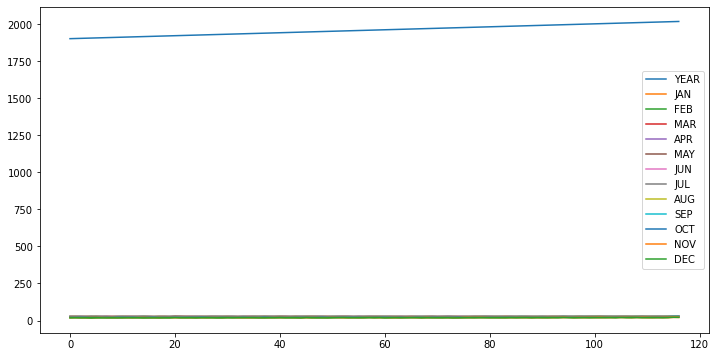

In [41]:
data.plot(figsize=(12,6))

In [42]:
train_dates = pd.to_datetime(data['YEAR'])
train_dates

0     1970-01-01 00:00:00.000001901
1     1970-01-01 00:00:00.000001902
2     1970-01-01 00:00:00.000001903
3     1970-01-01 00:00:00.000001904
4     1970-01-01 00:00:00.000001905
                   ...             
112   1970-01-01 00:00:00.000002013
113   1970-01-01 00:00:00.000002014
114   1970-01-01 00:00:00.000002015
115   1970-01-01 00:00:00.000002016
116   1970-01-01 00:00:00.000002017
Name: YEAR, Length: 117, dtype: datetime64[ns]

In [43]:
# variables for training
cols = list(data)[1:13]

In [44]:
data_for_training = data[cols].astype(float)
data_for_training

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...
112,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89


In [45]:
scaler = StandardScaler()
scaler = scaler.fit(data_for_training)
data_for_training_scaled = scaler.transform(data_for_training)

In [46]:
trainX=[]
trainY=[]

In [47]:
n_future = 1
n_past = 10

In [48]:
for i in range(n_past, len(data_for_training_scaled) - n_future+1):
    trainX.append(data_for_training_scaled[i-n_past:i, 0:data_for_training.shape[1]])
    trainY.append(data_for_training_scaled[i+n_future-1:i+n_future,0])

trainX, trainY = np.array(trainX), np.array(trainY)

In [49]:
trainX.shape, trainY.shape

((107, 10, 12), (107, 1))

In [50]:
# model = Sequential()
# model.add(LSTM(64,activation='relu',input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# model.add(LSTM(32,activation='relu',return_sequences=False))
# model.add(Dropout(0.5))
# model.add(Dense(trainY.shape[1]))


model = Sequential()
model.add(LSTM(64,activation='linear',input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dense(1))
model.add(Dropout(0.9))
model.add(LSTM(32,activation='linear',return_sequences=True))
model.add(Dropout(0.9))
model.add(Dense(1))
model.add(LSTM(32,activation='linear',return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(trainY.shape[1]))

In [51]:
model.compile(optimizer='adam',loss='mse',metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 64)            19712     
                                                                 
 dense_3 (Dense)             (None, 10, 1)             65        
                                                                 
 dropout_3 (Dropout)         (None, 10, 1)             0         
                                                                 
 lstm_4 (LSTM)               (None, 10, 32)            4352      
                                                                 
 dropout_4 (Dropout)         (None, 10, 32)            0         
                                                                 
 dense_4 (Dense)             (None, 10, 1)             33        
                                                                 
 lstm_5 (LSTM)               (None, 32)               

In [52]:
history = model.fit(trainX, trainY,epochs=40, batch_size=7, validation_split=0.2,verbose=1)

Epoch 1/40
13/13 [==============================] - 2s 31ms/step - loss: 0.5932 - accuracy: 0.0000e+00 - val_loss: 2.6529 - val_accuracy: 0.0000e+00
Epoch 2/40
13/13 [==============================] - 0s 8ms/step - loss: 0.5793 - accuracy: 0.0000e+00 - val_loss: 2.7607 - val_accuracy: 0.0000e+00
Epoch 3/40
13/13 [==============================] - 0s 8ms/step - loss: 0.5598 - accuracy: 0.0000e+00 - val_loss: 2.8921 - val_accuracy: 0.0000e+00
Epoch 4/40
13/13 [==============================] - 0s 8ms/step - loss: 0.5428 - accuracy: 0.0000e+00 - val_loss: 3.0948 - val_accuracy: 0.0000e+00
Epoch 5/40
13/13 [==============================] - 0s 8ms/step - loss: 0.5554 - accuracy: 0.0000e+00 - val_loss: 3.1410 - val_accuracy: 0.0000e+00
Epoch 6/40
13/13 [==============================] - 0s 14ms/step - loss: 0.5570 - accuracy: 0.0000e+00 - val_loss: 2.9405 - val_accuracy: 0.0000e+00
Epoch 7/40
13/13 [==============================] - 0s 8ms/step - loss: 0.5714 - accuracy: 0.0000e+00 - val_lo

In [53]:
hist = pd.DataFrame(history.history)
hist['Epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,Epoch
0,0.593226,0.0,2.652862,0.0,0
1,0.579299,0.0,2.760695,0.0,1
2,0.559832,0.0,2.892140,0.0,2
3,0.542772,0.0,3.094841,0.0,3
4,0.555363,0.0,3.141007,0.0,4
5,0.557016,0.0,2.940507,0.0,5
6,0.571403,0.0,2.855321,0.0,6
7,0.564469,0.0,2.829711,0.0,7
8,0.564732,0.0,2.838286,0.0,8
9,0.558042,0.0,2.903214,0.0,9


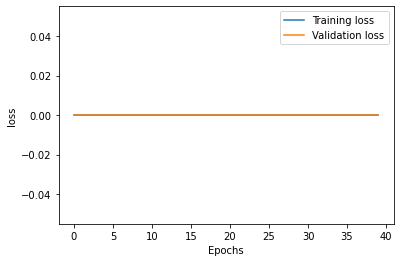

In [54]:
plt.plot(history.history['accuracy'],label='Training loss')
plt.plot(history.history['val_accuracy'],label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

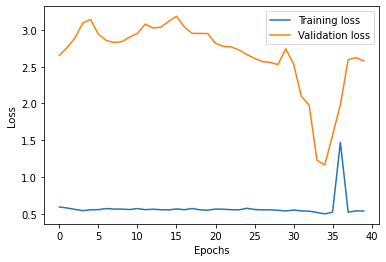

In [55]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [80]:
n_future=20
forecast_period_dates = pd.date_range(list(train_dates)[-1],periods=n_future,freq='24M').tolist()

In [81]:
forecast = model.predict(trainX[-n_future:])

1/1 [==============================] - 0s 20ms/step


In [82]:
forecast_copy = np.repeat(forecast,data_for_training.shape[1],axis=-1)
y_pred_future= scaler.inverse_transform(forecast_copy)[:,3]

In [83]:
y_pred_future

array([26.401184, 26.40654 , 26.397942, 26.394949, 26.400415, 26.410557,
       26.421705, 26.44009 , 26.46789 , 26.461119, 26.472916, 26.521473,
       26.484295, 26.472597, 26.457935, 26.477215, 26.547054, 26.485476,
       26.560343, 26.52031 ], dtype=float32)

In [84]:
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [85]:
data_forecast = pd.DataFrame({'Date':np.array(forecast_dates),'predicted_val':y_pred_future})
data_forecast['Date']=pd.to_datetime(data_forecast['Date'])

In [86]:
original = data[['YEAR','JAN']]
original['YEAR'] = pd.to_datetime(original['YEAR'])
original = original.loc[original['YEAR']>='2000-1-1']

C:\Users\Shambhavi\AppData\Local\Temp\ipykernel_12040\2640253002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['YEAR'] = pd.to_datetime(original['YEAR'])


e:\Miniconda_Installation\envs\Jupyter_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


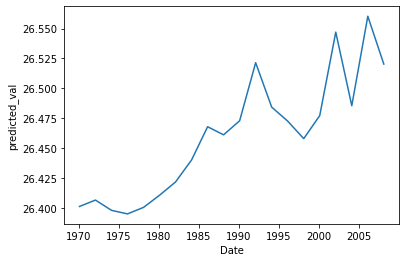

In [87]:
sns.lineplot(original['YEAR'],original['JAN'])
sns.lineplot(data_forecast['Date'],data_forecast['predicted_val'])
plt.show()